Rayhan Fadhlurrahman (24523223)
Naufal Ahmad Fauzi (24523168)

In [12]:
!pip install -q kaggle scikit-learn pandas matplotlib seaborn

In [13]:
import kagglehub

# Download dataset dari Kaggle
path = kagglehub.dataset_download('mathchi/diabetes-data-set', force_download=True)

print(f"Dataset downloaded to: {path}")


Using Colab cache for faster access to the 'diabetes-data-set' dataset.
Dataset downloaded to: /kaggle/input/diabetes-data-set


In [14]:
import os

# Lihat isi folder hasil download
print("Isi folder dataset:")
for file in os.listdir(path):
    print("-", file)


Isi folder dataset:
- diabetes.csv


Dataset berhasil dimuat ✅
Ukuran data: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
import numpy as np

# Daftar kolom yang 0-nya dianggap missing
cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in cols_with_zero:
    zero_count = (df[col] == 0).sum()
    if zero_count > 0:
        df[col] = df[col].replace(0, df[col].median())
        print(f"Kolom {col}: {zero_count} nilai 0 diganti median ({df[col].median()})")

print("\nCek lagi ringkasan statistik:")
df.describe()


Kolom Glucose: 5 nilai 0 diganti median (117.0)
Kolom BloodPressure: 35 nilai 0 diganti median (72.0)
Kolom SkinThickness: 227 nilai 0 diganti median (23.0)
Kolom Insulin: 374 nilai 0 diganti median (31.25)
Kolom BMI: 11 nilai 0 diganti median (32.0)

Cek lagi ringkasan statistik:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [18]:
X = df.drop(columns=['Outcome'])
y = df['Outcome']


In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


Train shape: (614, 8)
Test shape: (154, 8)


In [20]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [21]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)
print("Model Logistic Regression berhasil dilatih ✅")


Model Logistic Regression berhasil dilatih ✅


In [22]:
y_pred = model.predict(X_test_scaled)

import pandas as pd
compare = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
})
compare.head(10)


,Actual,Predicted
0,0,1
1,0,0
2,0,0
3,1,0
4,0,0
5,0,0
6,1,0
7,1,1
8,0,0
9,0,1


In [23]:
from sklearn.metrics import classification_report

print("=== Classification Report ===")
print(classification_report(y_test, y_pred))


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.60      0.50      0.55        54

    accuracy                           0.71       154
   macro avg       0.68      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154



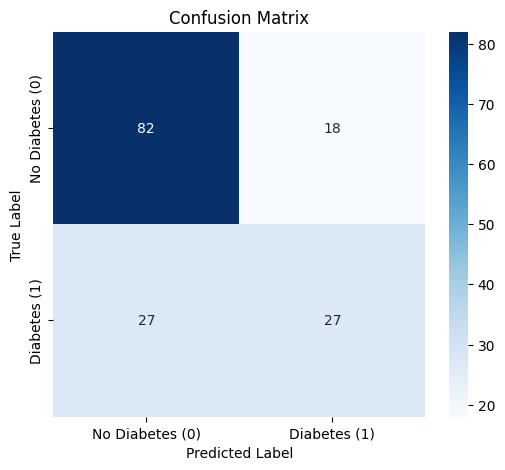

In [24]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
labels = ['No Diabetes (0)', 'Diabetes (1)']

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [25]:
tn, fp, fn, tp = cm.ravel()
print(f"True Negative (TN): {tn}")
print(f"False Positive (FP): {fp}")
print(f"False Negative (FN): {fn}")
print(f"True Positive (TP): {tp}")

print("\nAnalisis Singkat:")
print("- Precision tinggi = model jarang salah memprediksi orang sehat sebagai sakit.")
print("- Recall tinggi = model lebih baik mendeteksi penderita diabetes (penting untuk kasus medis).")
print("- F1-score menyeimbangkan precision dan recall.")
print("- Perhatikan rasio FN (False Negative): makin kecil makin baik, karena berarti kasus positif tidak banyak terlewat.")


True Negative (TN): 82
False Positive (FP): 18
False Negative (FN): 27
True Positive (TP): 27

Analisis Singkat:
- Precision tinggi = model jarang salah memprediksi orang sehat sebagai sakit.
- Recall tinggi = model lebih baik mendeteksi penderita diabetes (penting untuk kasus medis).
- F1-score menyeimbangkan precision dan recall.
- Perhatikan rasio FN (False Negative): makin kecil makin baik, karena berarti kasus positif tidak banyak terlewat.
